In [81]:
#importing stuff and defining non important things

import matplotlib.pyplot as plt
import numpy as np

from scipy.constants import hbar, e

#pauli matrices
identity = np.array([[1,0],[0,1]]) 
s1 = np.matrix([[0,1],[1,0]])
s2 = np.matrix([[0,-1j],[1j,0]])
s3 = np.matrix([[1,0],[0,-1]])

Let the two valley indexes be $K_0,K_1$

$-e\mathbf J_{K_{\alpha}}(\mathbf r)= \sum_{\beta\in \{0,1\}} \sigma_{K_\alpha K_\beta}(\mathbf r)\nabla \psi_{K_\beta}(\mathbf r)$

$ \psi_{K_\beta}(\mathbf r)$ is the elettrochemical potential

$ \psi_{K_\beta}(\mathbf r) = V(\mathbf r) - \frac 1e \frac{\partial}{\partial n_{K_\beta}} F(n_{K_0},n_{K_1}, T)$

where  $F(n_{K_0},n_{K_1}, T)$ is the free energy density in term of the local valley density $n_{K_\alpha}(\mathbf r)$, this means that 

$\mu (n_{K_0},n_{K_{1}}, T)=\frac{\partial}{\partial n_{K_\beta}} F(n_{K_0},n_{K_{1}}, T)$

From now on we are going to assume $T=0$, so the electron will have a step distibution

The hamiltonian near the two valleys is

$H_{K_0}=-H_{K_1}^*=\hbar v_f\mathbf k \cdot \mathbf \sigma + \Delta \sigma^z$

where $v_f=\frac {\sqrt 3}2 at/\hbar$ and $a,t$ is the hopping constant and the lattice spacing

for an easier notation we are going to define $q=v_f\hbar k$

The enegy eigenvalues of a Dirac Hamiltonian are 

$E=\pm \sqrt{\Delta^2 + q^2}$

and the Berry curvature is

$\Omega_{K_0,q_xq_y}=\frac 12 \frac{\Delta^2}{q^2E^3}[q_x+q_y-2q]$

if we integrate it between $0$ and $q_f$ we have that

$\int_{q<q_f}\Omega_{K_0,q_xq_y}dq_xdq_y=-2\pi \frac{q_f}{\Delta^2+q_f^2}$

In [86]:
# Eigenvalues of the Hamiltonian
def DiracEnergy(k_x,k_y=0,delta=0):
    dispersion_vector=np.array([k_x,k_y,delta])
    return np.linalg.norm(dispersion_vector)

#Berry curvature of the hamiltonian in terms of k_x and k_y
def BerryCurvatureDiracHamiltonian(k_x,k_y=0,delta=0):
    return np.array([k_x,k_y,delta])/2*DiracEnergy(k_x,k_y,delta)**3

/var/folders/vg/h6knjndn79l9ytz887vfbrcm0000gn/T/ipykernel_2972/2628582292.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dispersion_vector=np.array([k_x,k_y,delta])


Text(0, 0.5, 'E(k)')

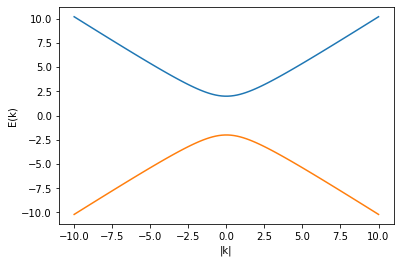

In [88]:
#plot the eigenvalues of the hamiltonian

x=np.linspace(-10,10,100)
y1=DiracEnergy(x,delta=2)
y2=-DiracEnergy(x,delta=2)

plt.plot(x,y1)
plt.plot(x,y2)
plt.xlabel('|k|')
plt.ylabel('E(k)')

# No intervalley interactions

For now we are going to ignore intervalley scattering, this means that $\sigma_{K_0K_1}=\sigma_{K_1K_0}=0$, and we will write for simplicity the diagonal elements with just one index ($\sigma_{K_\alpha K_\alpha}=\sigma_{K_\alpha}$)

Keep in mind that each $\sigma_{K_\alpha}$ is a matrix that must be simmetric under rotations this means that the elements are in the form


$\sigma_{K_\alpha}=\begin{vmatrix}
\sigma_{K_\alpha,xx} & \sigma_{K_\alpha,xy}\\
-\sigma^*_{K_\alpha,xy} & \sigma_{K_\alpha,xx}
\end{vmatrix}$

The diagonal entries are from the classic conducibility, while the off diagonal elements are from the Berry curvature

$\sigma_{K_\alpha,xy}=\frac {e^2} \hbar\int f(E_k)\Omega_{K_\alpha}(\mathbf k)\frac{d\mathbf k}{(2\pi)^2}$

from this we can notice that $\sigma_{K_\alpha,xy}\in \R$, and since the two valleys have opposite berry curvature $\sigma_{K_0,xy}=-\sigma_{K_1,xy}$

as far as the diagonal elements, we have that $\sigma_{K_0,xx}=\sigma_{K_1,xx}$

This means that we can define 

$\sigma=\begin{vmatrix}
\sigma_{xx} & \sigma_{xy}\\
-\sigma_{xy} & \sigma_{xx}
\end{vmatrix}=\sigma_{xx}\delta_{ij} + \sigma_{xy}\epsilon_{ij}$

such that $\sigma_{K_0}=\sigma$ and $\sigma_{K_1}=\sigma^T$

If we calculate the $\sigma_{xy}$ we have that

$\sigma_{K_\alpha,xy}=-\frac {e^2}{2\pi \hbar}\frac{\sqrt{\mu^2-\Delta^2}}\mu \Theta(\mu^2-\Delta^2)\textrm{sign}(\mu)$

witch is plotted below

In [82]:
delta=1 #this is empirical and should be changed from material to material
def sigma_xy(mu):
    multiplier=(mu>delta)-1*(mu<delta)
    f_E=np.sqrt(mu**2-delta**2)/mu
    
    if type (f_E)==type(np.array([1])): f_E[np.isnan(f_E)]=0

    hall_conductivity=e**2/(2*np.pi*hbar)
    return hall_conductivity*(1-f_E*multiplier)


sigma_xx=1 #this is empirical and should be changed from material to material
def sigma(mu,K=0): #alpha is the valley index
    return sigma_xx*identity+(-1)**K*sigma_xy(mu)

/var/folders/vg/h6knjndn79l9ytz887vfbrcm0000gn/T/ipykernel_2972/3837716489.py:3: RuntimeWarning: invalid value encountered in sqrt
  f_E=np.sqrt(mu**2-delta**2)/mu


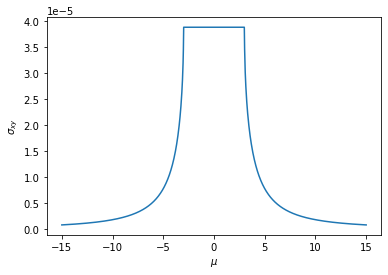

In [83]:
#plotting sigma_xy
x=np.linspace(-15,15,1000)
y=sigma_xy(x,3*np.ones(len(x)))
plt.plot(x,y)
plt.xlabel('$\mu$')
plt.ylabel('$\sigma_{xy}$')
plt.show()

Since the two valleys are now non-interacting the free energy can be written as the sum of the two Free energies

where $F(n_{K_0},n_{K_1})=F_0(n_{K_0}(\mathbf r))+F_1(n_{K_1}(\mathbf r))$

this means that we will have two distinct chemical potentials

$\mu_\alpha(n_{K_\alpha}(\mathbf r))=\frac{\partial}{\partial n_{K_\alpha}}F(n_{K_0},n_{K_1})=\frac{\partial}{\partial n_{K_\alpha}}F_\alpha(n_{K_\alpha}(\mathbf r))$

This simplifies the trasport equation in 

$-e\mathbf J_{K_{\alpha}}(\mathbf r)= \sigma_{K_\alpha}(\mathbf r)\nabla \psi_{K_\alpha}(\mathbf r)$

$\nabla \psi_{K_\alpha}(\mathbf r)=\nabla V(\mathbf r) -\frac 1e \frac{\partial}{\partial n_{K_\alpha}}\mu_\alpha(n_{K_\alpha}(\mathbf r))\nabla n_{K_\alpha}$

where $\frac{\partial \mu_{K_\alpha}}{\partial n_{K_\alpha}}=\frac{\pi}{\sqrt{2\pi |n|+\Delta^2}}+\Delta\delta(n)\approx \frac \pi\Delta +\Delta\delta(n) \quad \forall \alpha$ 

In [84]:
def mu_n(n):
    return np.sign(n)*np.sqrt(2*np.pi*np.abs(n)+delta**2)

def dmu_dn(n):
    return np.sqrt(2*np.pi*np.abs(n)+delta**2)

Putting everything together, and writing explicitely the coordinates with the indices $i,j$

$-eJ_{K_\alpha,i}(\mathbf r)=\sigma_{K_\alpha, ij}E_j(\mathbf r) -\frac 1e \sigma_{K_\alpha, ij}\frac{\partial \mu_\alpha}{\partial n_{K_\alpha}}[n_{K_\alpha}(\mathbf r)]\partial _jn_{K_\alpha}(\mathbf r)$

We can shorten the equation above by defining

$e^2D_{K_\alpha,ij}=\sigma_{K_\alpha, ij}\frac{\partial \mu_\alpha}{\partial n_{K_\alpha}}[n_{K_\alpha}(\mathbf r)]$

$-eJ_{K_\alpha,i}(\mathbf r)=\sigma_{K_\alpha, ij}E_j(\mathbf r) -eD_{K_\alpha,ij}\partial _jn_{K_\alpha}(\mathbf r)$

or, in matrix form

$-e\mathbf J_{K_\alpha}(\mathbf r)=\sigma_{K_\alpha}\mathbf E(\mathbf r) -eD_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$

where 

$\sigma_{K_\alpha}$ and  $-eD_{K_\alpha}$ are matrices

In [ ]:

def D_K(mu=0,K=0):
    sigma=sigma(mu,K) #k is the valley index
    dmu_dn=dmu_dn(mu)
    return sigma*dmu_dn

def J_K(E,grad_n,mu=0,K=0):
    """
    args:
        E(np.array): electric field, must be 2-dimentional
        grad_n(np.array): gradient of the density of charge in the valley k, must be 2-dimentional
    """
    sigma=sigma(mu,K)
    D_K=D_K(mu=0,K=0)
    return np.dot(sigma,E)+np.dot(D_K,grad_n)

## Re-writing the equations in terms of charge current and valley current

Now we will write the currents in terms fo the charge current $\mathbf J_{c}=\mathbf J_{K_0}+\mathbf J_{K_1}$ and spin current $\mathbf J_{s}=\mathbf J_{K_0}-\mathbf J_{K_1}$

now we define $\sigma_c=\sigma_{K_0}+\sigma_{K_1}$ and $\sigma_s=\sigma_{K_0}-\sigma_{K_1}$, this means that

$\sigma_c=2\sigma_{xx}\delta_{ij}$ and $\sigma_v=2\sigma_{xy}\epsilon_{ij}$

The term $-eD_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$ is a little harder to traslate. First off we are going to impose the local charge conservation

$n_c(\mathbf r)=n_{K_0}+n_{K_1}\approx 0$, and so 

$n_v(\mathbf r)=n_{K_0}-n_{K_1}=2n_{K_0}=-2n_{K_1}$

### Writing $J_c$

Now let's do the sum of the $D_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$ terms to write them in terms of charge and valleys degrees of freedom

$D_{K_0}\nabla n_{K_0}+D_{K_1}\nabla n_{K_1}=(D_{K_0}-D_{K_1})\nabla n_v(\mathbf r)/2$

$D_{K_0}-D_{K_1}=\sigma \frac{\partial \mu_0}{\partial n_{K_0}}- \sigma^T \frac{\partial \mu_1}{\partial n_{K_1}}$

since $\mu_v=2\mu_0=-2\mu_1$ and $n_v=2n_{K_0}=-2n_{K_1}$

$D_{K_0}-D_{K_1}=\frac 1{e^2}(\sigma-\sigma^T)\frac{\partial \mu_v}{\partial n_v}=\frac 2{e^2}\sigma_v\frac{\partial \mu_v}{\partial n_v}$

so i define 

$D_{cv}=\frac 2{e^2}\sigma_v\frac{\partial \mu_v}{\partial n_v}\approx\frac 2{e^2} \frac \pi\Delta\sigma_v$

so we get that

$D_{K_0}\nabla n_{K_0}+D_{K_1}\nabla n_{K_1}=D_{cv}n_v$

Putting it all together we have that

$\mathbf J_c(\mathbf r)=\sigma_c \mathbf E(\mathbf r)+eD_{cv}\nabla n_v(\mathbf r)$

Writing all the indices

$J_{c,i}=\sum_j \sigma_{c,xx}\delta_{ij}E_i+D_{cv,xy}\epsilon_{ij}\partial_j n_v$

so we can rewrite them as

$\mathbf J_{c}= \sigma_{c,xx}\mathbf E_i + D_{cv,xy} \nabla \times n_v$

where $\sigma_{c,xx}$ and $D_{cv,xy}$ are scalars

### Writing $\mathbf J_v$

and now the difference of the $D_{K_\alpha}\nabla n_{K_\alpha}(\mathbf r)$ terms to write them in terms of charge and valleys degrees of freedom

$D_{K_0}\nabla n_{K_0}-D_{K_1}\nabla n_{K_1}=(D_{K_0}+D_{K_1})\nabla n_v(\mathbf r)/2$

and with some calculations that are very similar to the one we use to calculate $\mathbf J_c$ we have that

$D_v=\frac12(D_{K_0}+D_{K_1})=\frac 1{e^2}\sigma_c\frac{\partial \mu_c}{\partial n_c}$

so,

$\mathbf J_v(\mathbf r)=\sigma_v\mathbf E(\mathbf r)+eD_{v}\nabla n_v(\mathbf r)$

which can be re-written as

$\mathbf J_{v,i}(\mathbf r)=\sum_j \sigma_{c,xy} \epsilon_{ij} \mathbf E_j(\mathbf r)+eD_{v,xx}\delta_{ij}\partial_j n_v(\mathbf r)$

where $\sigma_{c,xy}$ and $D_{v,xx}$ are scalars


In [85]:
def J_c(E,grad_n,mu=0):
    return J_K(E,grad_n,mu,0)+J_K(E,-grad_n,-mu,delta,1)
    
def J_v(E,grad_n,mu=0):
    return J_K(E,grad_n,mu,0)-J_K(E,-grad_n,-mu,1)

def D_c(mu):
    return (D_K(mu,K=0) - D_K(-mu,K=1))/2

def D_v(mu):
    return (D_K(mu,K=0) + D_K(-mu,K=1))/2

Now lets calculate the laplacians!

$\nabla \cdot \mathbf J_c=\nabla \cdot (\sigma_c \mathbf E)+ e\nabla \cdot (D_{cv}\nabla n_v)$

all the divergence in this equation are equal to zero for a reason or another, this means that $\nabla^2 V(x,y)=0$ inside the material il will be easier to find the field inside given the bondray conditions, instead if we calculate

$\nabla \cdot \mathbf J_v=\nabla \times (\sigma_{c,xy} \mathbf E)+ e\nabla \cdot (D_{v,xx}\nabla n_v)$

Now, lets analythe all the terms one by one

- For the continuity equation we have that $\nabla \cdot \mathbf J_v=\frac \partial {\partial t} n_v$, since intervalley scattering is zero, this should be zero, but  why don't add it back now? so we say that it decays exponentially $\frac \partial {\partial t} n_v=\frac 1 {\tau_v} n_v$

- $e\nabla \cdot (D_{v,xx}\nabla n_v)$ is really nothing special, inside the material $D_{v,xx}$ is constsant so in the end it is equal to $eD_{v,xx}\nabla^2 n_v$

- $\nabla \times (\sigma_{c,xy} \mathbf E)$ is equal to zero inside the material, but on the edge can be non-zero because $\sigma_{c,xy}$ changes form inside to the outside

## Notazione

$\omega^2(k)=k^2+l_v^{-2}\quad$ e $\quad l_v^2=D_{v,xx}\tau_v$

$\tan(\theta _{VH})=\sigma _{v,xy}/\sigma _{c,xx}$

In [ ]:
tau_v=1 #it is empirical and should be changed from material to material
def l_v(mu,delta=0):
    D_v(mu, delta)*tau_v

def omega2(k,l_v): #this is omega^2 be careful!
    return k**2+l_v**2



# Useless parts

But we need to express the energy in terms of the charge density, and for this we need to calculate the density of states of the Dirac-Hamiltonian wich is equal to

$\rho(E)=\frac 1\pi E\theta(E^2-\Delta^2)$

If $\mu>0$ number of particles in a dirac hamiltonian with a fermi dirac distibution is

$n=\int_0^\mu \rho(E)dE=\frac 1\pi \int_0^\mu E\theta(E^2-\Delta^2)dE=\frac 1\pi\theta(\mu^2-\Delta^2)\int_\Delta^\mu EdE = \frac {\theta(\mu^2-\Delta^2)}{2\pi}(\mu^2-\Delta^2)$

if $\mu<0$ than we do the same, but with holes, so in the end

$n=\frac {\theta(\mu^2-\Delta^2)}{2\pi}(\mu^2-\Delta^2)\textrm{sign} (\mu)$